<a href="https://colab.research.google.com/github/MichalMichniak/ML2/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras import layers,models

network = models.Sequential()
network.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(13,13,32)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(5,5,64)))

network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu', input_shape=(576,)))
network.add(layers.Dense(10, activation='softmax'))


In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:

history = network.fit(x=train_images, y= train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.3483 - accuracy: 0.9397
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0596 - accuracy: 0.9832
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0394 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0346 - accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0290 - accuracy: 0.9925


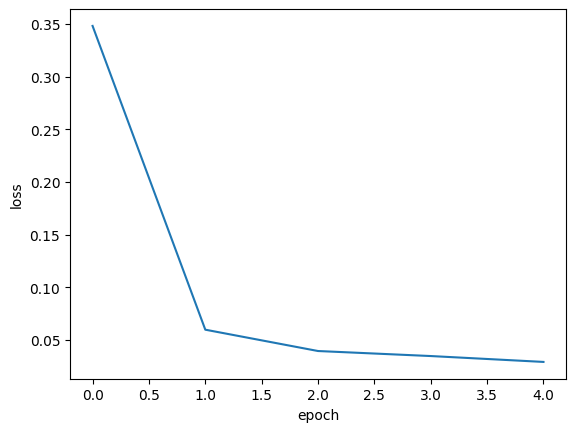

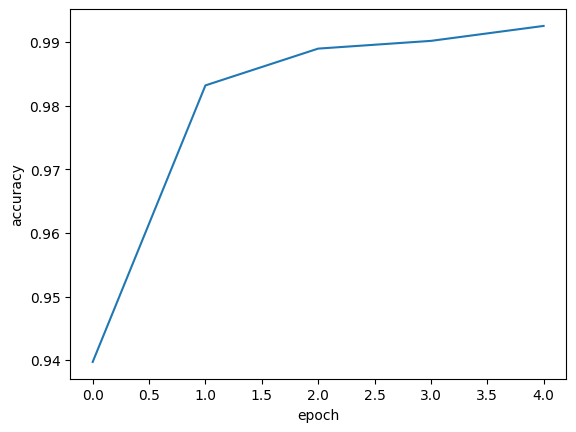

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0491 - accuracy: 0.9888
test_acc: 0.9887999892234802


ConvNet for small dataset

In [2]:
 ! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michaminik","key":"1ec9180ed62fa8d63353dabb02ba24f8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                               19MB  2024-02-21 20:16:17          15105        275  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                               3KB  2024-03-02 18:50:30           4880         82  0.9411765        
arnavvvvv/spotify-music                                       Top Spotify Songs                                47KB  2024-03-06 05:20:29           4308         61  1.0              
tarunrm09/climate-change-indicators                           Climate change Indicators   

In [4]:
! kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:06<00:00, 107MB/s]
100% 812M/812M [00:06<00:00, 130MB/s]


In [5]:
! unzip dogs-vs-cats.zip -d dogs-vs-cats

Archive:  dogs-vs-cats.zip
  inflating: dogs-vs-cats/sampleSubmission.csv  
  inflating: dogs-vs-cats/test1.zip  
  inflating: dogs-vs-cats/train.zip  


In [6]:
! unzip dogs-vs-cats/train.zip -d dogs-vs-cats/train

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: dogs-vs-cats/train/train/dog.55.jpg  
  inflating: dogs-vs-cats/train/train/dog.550.jpg  
  inflating: dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: dogs-vs-cats/train/train/dog.551.jpg  
  inflating: dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: dogs-vs-cats/train/train/dog.5511.jpg  
  inflating: dogs-vs-cats/train/train/dog.5512.jpg  
  inflating: dogs-vs-cats/train/train/

In [7]:
!rm -fr cats_vs_dogs
!mkdir cats_vs_dogs
!mkdir cats_vs_dogs/train
!mkdir cats_vs_dogs/validation
!mkdir cats_vs_dogs/test

!mkdir cats_vs_dogs/train/dog
!mkdir cats_vs_dogs/validation/dog
!mkdir cats_vs_dogs/test/dog

!mkdir cats_vs_dogs/train/cat
!mkdir cats_vs_dogs/validation/cat
!mkdir cats_vs_dogs/test/cat

In [8]:
import shutil
for i in range(1000):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/train/dog/dog.{i}.jpg")
for i in range(1000):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/train/cat/cat.{i}.jpg")

for i in range(1000,1500):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/validation/dog/dog.{i}.jpg")
for i in range(1000,1500):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/validation/cat/cat.{i}.jpg")

for i in range(1500,2000):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/test/dog/dog.{i}.jpg")
for i in range(1500,2000):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/test/cat/cat.{i}.jpg")

In [19]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "cats_vs_dogs/train",  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    "cats_vs_dogs/validation",  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
from keras import layers,models

network = models.Sequential()
network.add(layers.Rescaling(1./255, input_shape=(150,150,3)))
network.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(74,74,32)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(36,36,64)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(17,17,128)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(7,7,128)))

network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu', input_shape=(6272,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(512,)))

In [17]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)      

In [18]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [21]:

history = network.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30


100/100 [==============================] - 13s 79ms/step - loss: 0.7106 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6963 - accuracy: 0.5075 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6938 - accuracy: 0.5380 - val_loss: 0.6786 - val_accuracy: 0.6330
Epoch 4/30
100/100 [==============================] - 9s 84ms/step - loss: 0.6705 - accuracy: 0.6125 - val_loss: 0.6200 - val_accuracy: 0.6510
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6322 - accuracy: 0.6625 - val_loss: 0.9023 - val_accuracy: 0.5460
Epoch 6/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6056 - accuracy: 0.6800 - val_loss: 0.5849 - val_accuracy: 0.7020
Epoch 7/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5746 - accuracy: 0.7120 - val_loss: 0.5647 - val_accuracy: 0.7120
Epoch 8/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


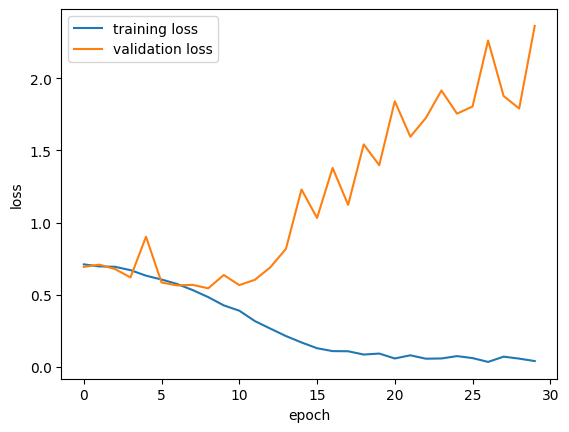

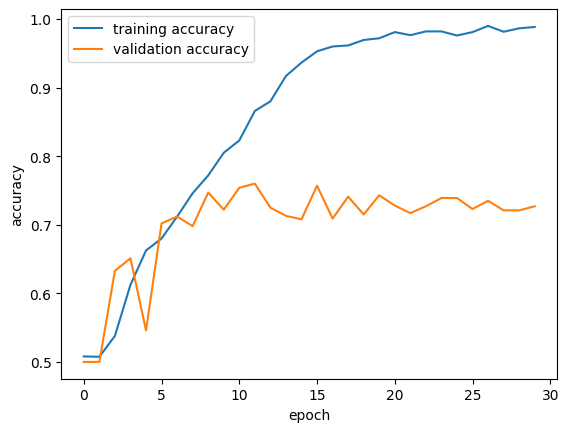

In [27]:
history_dict = history.history
print(history_dict.keys())

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.plot(history_dict['val_accuracy'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [23]:
test_dataset = image_dataset_from_directory(
    "cats_vs_dogs/test",  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [24]:
test_loss, test_acc = network.evaluate(test_dataset)

print('test_acc:', test_acc)

50/50 [==============================] - 2s 41ms/step - loss: 2.5461 - accuracy: 0.7100
test_acc: 0.7099999785423279
